In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

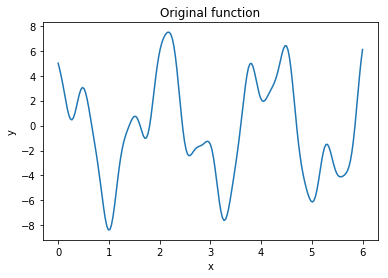

In [44]:
x = np.linspace(0, 6, 201)
#y=(6-x)*np.cos(17*x)/2
y=5*np.cos(3*x)-3*np.sin(8*x)+0.5*np.sin(17*x)
plt.title ('Original function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


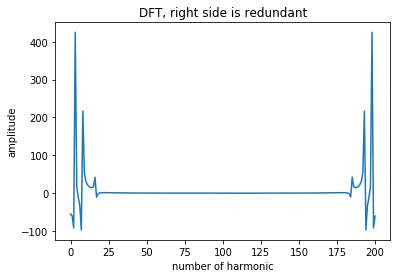

In [3]:

y_fft = fft.fft(y)
plt.title ('DFT, right side is redundant')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot(y_fft)

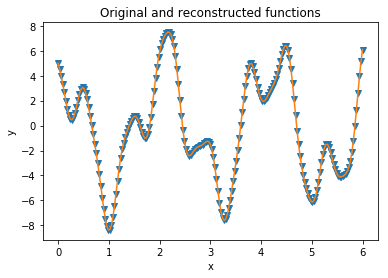

In [4]:
from scipy.fftpack import ifft
yf = ifft(y_fft )

plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf,label='function reconstructed by iDFT')

In [5]:
def windowRectangle( x_data, y_data):
    n=len(x_data)
    number=3
    k=int(n/number)
    y_1=np.copy(y_data)
    y_2=np.copy(y_data)
    y_3=np.copy(y_data)
    
    y_1[k:]=0
    
    y_2[:k]=0
    y_2[2*k:]=0
    
    y_3[:2*k]=0
    return y_1, y_2, y_3

In [6]:
y_1, y_2, y_3 =windowRectangle(x,y)

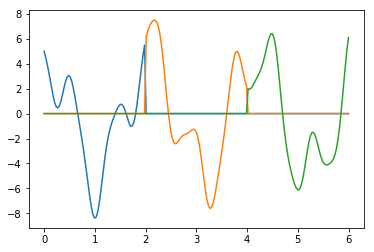

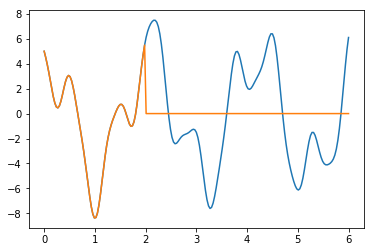

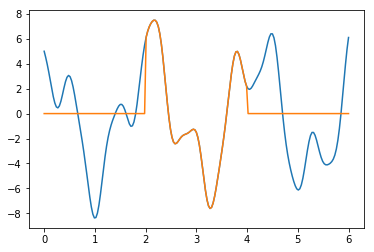

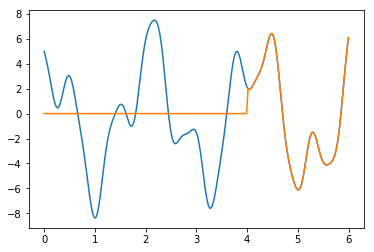

In [13]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.show()
plt.plot(x,y)
plt.plot(x,y_1)
plt.show()
plt.plot(x,y)
plt.plot(x,y_2)
plt.show()
plt.plot(x,y)
plt.plot(x,y_3)
plt.show()

In [15]:
y1_fft = fft.fft(y_1)
y2_fft = fft.fft(y_2)
y3_fft = fft.fft(y_3)

In [16]:
yf1 = ifft(y1_fft )
yf2 = ifft(y2_fft )
yf3 = ifft(y3_fft )

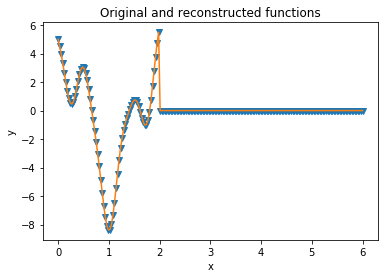

In [17]:
plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y_1, 'v',label='original function' )
plt.plot (x,yf1,label='function reconstructed by iDFT')

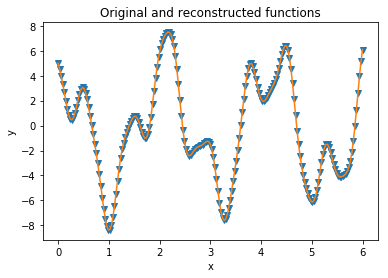

In [18]:
plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf1+yf2+yf3,label='function reconstructed by iDFT')

In [19]:
#окна от 0 до 100, от 50 до 150, от 100 до 200 //sin оборот pi
# sin((i-begin_sin[ibegin])*np.pi/100)
#окна от 0 до 50, от 150 до 200 // cos оборот pi/2
k=1
begin_sin=[0,50*k,100*k]
#begin_sin=[0,250,500]
begin_cos=[0,150*k]
n=len(y)
yk=np.zeros((5,n))
for ibegin in range(3):
    for i in range(begin_sin[ibegin],begin_sin[ibegin]+k*100+1):
        yk[ibegin,i]=y[i]*(np.sin((i-begin_sin[ibegin])*np.pi/(k*100))**2)

for i in range (0,k*50+1):
    yk[3,i]=y[i]*(np.cos((i)*np.pi/(k*100))**2)
    yk[4,i+k*150]=y[i+k*150]*(np.cos((i+k*150)*np.pi/(k*100))**2)
        


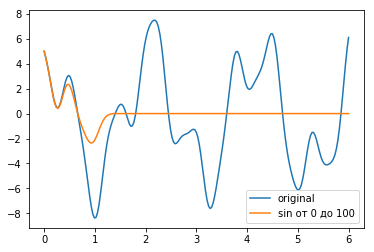

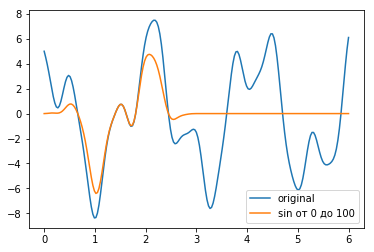

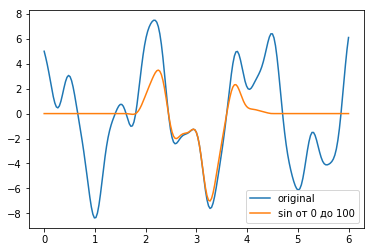

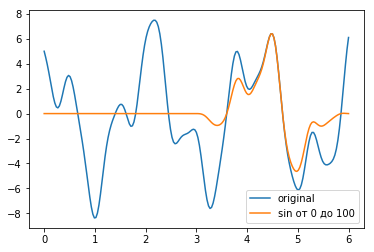

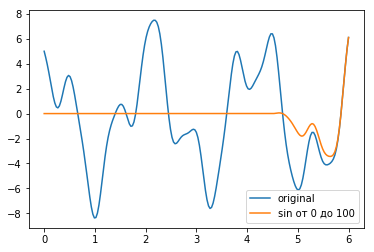

In [21]:
plt.plot(x,y, label='original')
plt.plot(x,yk[3], label='sin от 0 до 100')
plt.legend()
plt.show()

plt.plot(x,y, label='original')
plt.plot(x,yk[0], label='sin от 0 до 100')
#plt.plot(x,yk[3], label='cos от -50 до 50')
#plt.plot(x,yk[4], label='cos от 150 до 250')
plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[1], label='sin от 0 до 100')
plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[2], label='sin от 0 до 100')
plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[4], label='sin от 0 до 100')
plt.legend()
plt.show()

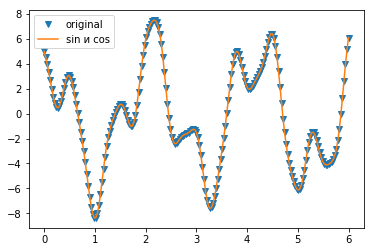

In [138]:
plt.plot(x,y,'v', label='original')
plt.plot(x,np.sum(yk,axis=0), label='sin и cos')
plt.legend()
plt.show()

In [22]:
yk_fft = fft.fft(yk)

In [23]:
yfk = ifft(yk_fft )

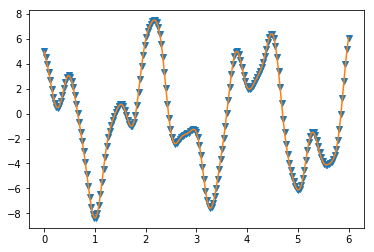

In [24]:
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,np.sum(yfk,axis=0),label='function reconstructed by iDFT')
plt.show()

In [46]:
#окна от 0 до 100, от 50 до 150, от 100 до 200 //sin оборот pi
# sin((i-begin_sin[ibegin])*np.pi/100)
#окна от 0 до 50, от 150 до 200 // cos оборот pi/2
k=1.96 #75%
C=2/3 #
#tanh (kx/(sqrt(1-x^2))) => x in [0,1]
begin_sin=[0,50,100]
#begin_sin=[0,250,500]
begin_cos=[0,150]
n=len(y)
yk=np.zeros((5,n))

for ibegin in range(3):    
    for i in range(begin_sin[ibegin],begin_sin[ibegin]+101):
        x_i=(i-begin_sin[ibegin])/100
        if(x_i<1):
            yk[ibegin,i]=y[i]*np.tanh(k*x_i/((1-x_i**2)**(1/2)))*C
        else: 
            yk[ibegin,i]=y[i]*C
        
for i in range (0,51):
    x_i= i/100
    if(x_i<1/2):
        x1=k*(x_i+1/2)/((1-(x_i+1/2)**2)**(1/2))
        yk[3,i]=y[i]* np.tanh(x1)*C
    else:
        yk[3,i]=y[i]*C
    #x2=k*x_i/((1-x_i**2)**(1/2))
    x2=k*x_i/((1 - x_i**2)**(1/2))
    yk[4,i+150]=y[i+150]*np.tanh(x2)*C

                                       
        

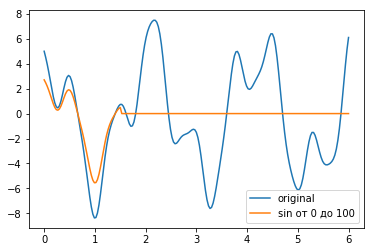

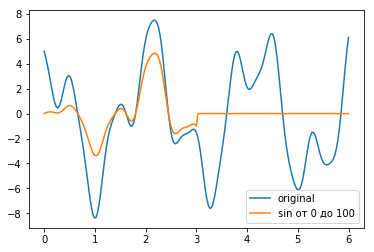

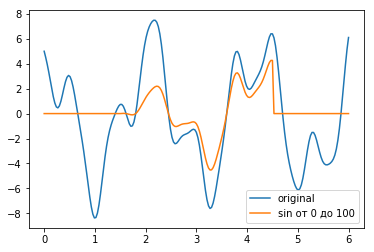

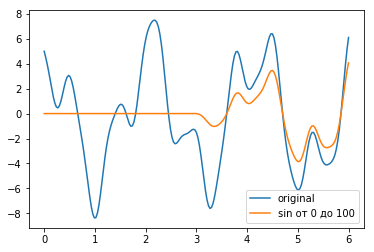

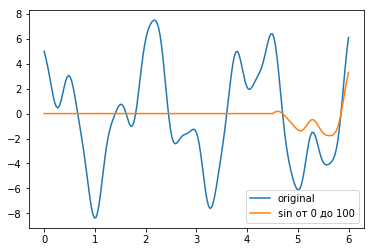

In [47]:
plt.plot(x,y, label='original')
plt.plot(x,yk[3], label='sin от 0 до 100')
plt.legend()
plt.show()

plt.plot(x,y, label='original')
plt.plot(x,yk[0], label='sin от 0 до 100')

plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[1], label='sin от 0 до 100')
plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[2], label='sin от 0 до 100')
plt.legend()
plt.show()
plt.plot(x,y, label='original')
plt.plot(x,yk[4], label='sin от 0 до 100')
plt.legend()
plt.show()

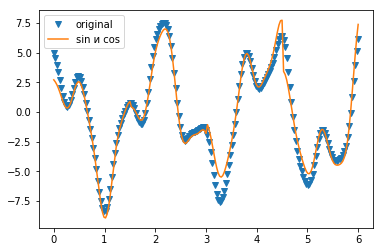

In [48]:
plt.plot(x,y,'v', label='original')
plt.plot(x,np.sum(yk,axis=0), label='sin и cos')
plt.legend()
plt.show()

In [25]:
def fun(x):
    n=len(x)
    y=np.zeros(n)
    for i in range(n):
        a=x[i]
        if(a<2):
            y[i]=-3
        elif(a<5):
            y[i]=4
        elif(a<8):
            y[i]=0
        else :
            y[i]=-7
    return y

In [26]:
x=np.linspace(0,10,1001)
y=fun(x)

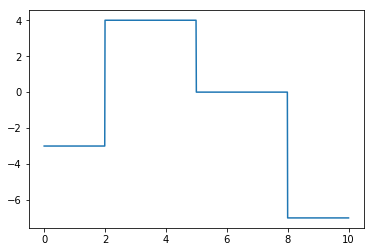

In [27]:
plt.plot(x,y)
plt.show()

In [28]:
y_fft = fft.fft(y)

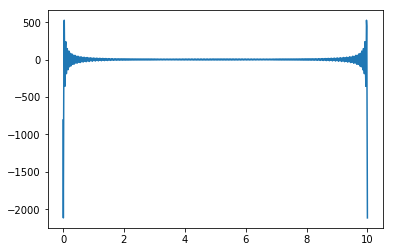

In [29]:
plt.plot(x,y_fft)

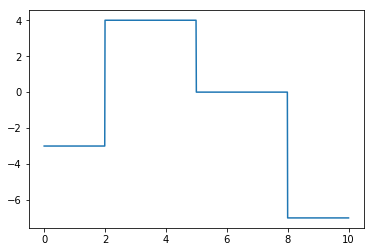

In [30]:
yf = ifft(y_fft )
plt.plot(x,yf)

In [31]:
np.tanh(0)

0.0